### **Nuha Mohammed Alshammari 202305117**
### **Maha Eid Alrashid 202307140**
### **Fajer Saad Alfozan 202305119**


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.


# import a tool to get data from Kaggle
import kagglehub
# download the stock market dataset from Kaggle
jacksoncrow_stock_market_dataset_path = kagglehub.dataset_download('jacksoncrow/stock-market-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'stock-market-dataset' dataset.
Data source import complete.


In [ ]:
import pandas as pd                                        # data tables
import numpy as np                                         # math & numbers
import plotly.express as px                                # charts
import matplotlib.pyplot as plt                            # charts
import statsmodels.api as sn                               # statistics (not used)
from sklearn.metrics import r2_score, mean_squared_error   # model accuracy (R², MSE)
from scipy.stats import pearsonr, spearmanr                # correlation metrics
from sklearn.model_selection import train_test_split       # split data

# Machine Learning models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

# It makes all numeric values have similar scales (important for KNN)
from sklearn.preprocessing import StandardScaler


In [ ]:
# read Apple stock data file
aapl = pd.read_csv('/kaggle/input/stock-market-dataset/stocks/AAPL.csv')

In [ ]:
# convert 'Date' column to real date format
aapl['Date'] = pd.to_datetime(aapl['Date'])

In [ ]:
# --- Data Overview ---

# Show dataset info (column names, data types, missing values)
print(aapl.info())

# Show basic stats (mean, min, max, std, etc.)
print(aapl.describe())

# Show the dataset size (number of rows and columns)
print(aapl.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       9909 non-null   datetime64[ns]
 1   Open       9909 non-null   float64       
 2   High       9909 non-null   float64       
 3   Low        9909 non-null   float64       
 4   Close      9909 non-null   float64       
 5   Adj Close  9909 non-null   float64       
 6   Volume     9909 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 542.0 KB
None
                                Date         Open         High          Low  \
count                           9909  9909.000000  9909.000000  9909.000000   
mean   2000-07-30 08:33:08.010899200    32.606849    32.936079    32.277560   
min              1980-12-12 00:00:00     0.198661     0.198661     0.196429   
25%              1990-10-02 00:00:00     1.071429     1.089286     1.048571   


In [ ]:
# --- Data Cleaning Section ---
print("Number of missing values in each column:")
print(aapl.isnull().sum())

# Check duplicates before removing them
print("Number of duplicate rows before cleaning:", aapl.duplicated().sum())

# Drop rows that contain missing values
aapl = aapl.dropna()

# Drop duplicate rows
aapl = aapl.drop_duplicates()

print("✅ Data cleaned successfully! No missing or duplicate values found.")


Number of missing values in each column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Number of duplicate rows before cleaning: 0
✅ Data cleaned successfully! No missing or duplicate values found.


In [ ]:
# show first 5 rows of the data
aapl.head()
print(aapl.head())

# add 'Target' column: 1 if price goes up, 0 if down
aapl['Target'] = (aapl['Close'] > aapl['Open']).astype(int)

        Date      Open      High       Low     Close  Adj Close     Volume
0 1980-12-12  0.513393  0.515625  0.513393  0.513393   0.406782  117258400
1 1980-12-15  0.488839  0.488839  0.486607  0.486607   0.385558   43971200
2 1980-12-16  0.453125  0.453125  0.450893  0.450893   0.357260   26432000
3 1980-12-17  0.462054  0.464286  0.462054  0.462054   0.366103   21610400
4 1980-12-18  0.475446  0.477679  0.475446  0.475446   0.376715   18362400


In [ ]:
# remove columns we don't use for training
x= aapl.drop(labels={'Date','Close','Adj Close'},axis=1)

In [ ]:
# put all rows in order by date (to avoid time leak)
aapl = aapl.sort_values(by='Date')

# use old data for training and new data for testing
train = aapl[aapl['Date'] < '2020-01-01']
test = aapl[aapl['Date'] >= '2020-01-01']

# x_train = input data for training (without Close price)
# y_train = output data (the Close price we want to predict)
x_train = train.drop(columns=['Date', 'Close', 'Adj Close'])
y_train = train['Close']

# do the same for testing data
x_test = test.drop(columns=['Date', 'Close', 'Adj Close'])
y_test = test['Close']


In [ ]:
# create and train the model
model = RandomForestRegressor().fit(x_train,y_train)

In [ ]:
# display the created model
model

RandomForestRegressor()

In [ ]:
# make predictions for Close price
predictions = model.predict(x_test)

# R-squared (model accuracy)
r2 = r2_score(y_test, predictions)

# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, predictions)

# RMSE (Root Mean Squared Error)
rmse = mse ** 0.5

# Pearson correlation (linear relationship)
pearson_corr, _ = pearsonr(y_test, predictions)

# Spearman correlation (non-linear relationship)
spearman_corr, _ = spearmanr(y_test, predictions)

# show all results
print("Random Forest Regressor Results")
print("-------------------------------------")
print('R-squared:', r2)
print('MSE:', mse)
print('RMSE:', rmse)
print('Pearson Correlation:', pearson_corr)
print('Spearman Correlation:', spearman_corr)


Random Forest Regressor Results
-------------------------------------
R-squared: 0.5788723728788863
MSE: 366.64214925745193
RMSE: 19.147901954455794
Pearson Correlation: 0.9365431296247541
Spearman Correlation: 0.8859165978979788


In [ ]:
# Linear Regression Model

# Step 1: Create the model
linear_model = LinearRegression()

# Step 2: Train the model using training data
linear_model.fit(x_train, y_train)

# Step 3: Make predictions on the test data
linear_predictions = linear_model.predict(x_test)

# Step 4: Evaluate the model
r2_linear = r2_score(y_test, linear_predictions)                     # R-squared (accuracy)
mse_linear = mean_squared_error(y_test, linear_predictions)          # Mean Squared Error
rmse_linear = mse_linear ** 0.5                                      # Root Mean Squared Error

# Correlations
pearson_corr_linear, _ = pearsonr(y_test, linear_predictions)        # Pearson correlation (linear relationship)
spearman_corr_linear, _ = spearmanr(y_test, linear_predictions)      # Spearman correlation (non-linear relationship)

# Step 5: Print all results clearly
print("Linear Regression Results")
print("-------------------------------------")
print("R-squared:", r2_linear)
print("MSE:", mse_linear)
print("RMSE:", rmse_linear)
print("Pearson Correlation:", pearson_corr_linear)
print("Spearman Correlation:", spearman_corr_linear)


Linear Regression Results
-------------------------------------
R-squared: 0.9836935737311215
MSE: 14.19670140095165
RMSE: 3.7678510322134087
Pearson Correlation: 0.9921013111837551
Spearman Correlation: 0.9897753456221199


In [ ]:
# Decision Tree Regressor

# Step 1: Create the model
dt_model = DecisionTreeRegressor(random_state=42)

# Step 2: Train the model using training data
dt_model.fit(x_train, y_train)

# Step 3: Make predictions on the test data
dt_predictions = dt_model.predict(x_test)

# Step 4: Evaluate the model
r2_dt = r2_score(y_test, dt_predictions)                 # R-squared
mse_dt = mean_squared_error(y_test, dt_predictions)      # Mean Squared Error
rmse_dt = mse_dt ** 0.5                                  # Root Mean Squared Error

# Correlations
pearson_corr_dt, _ = pearsonr(y_test, dt_predictions)    # Pearson correlation
spearman_corr_dt, _ = spearmanr(y_test, dt_predictions)  # Spearman correlation

# Step 5: Print results clearly
print("Decision Tree Regressor Results")
print("-------------------------------------")
print("R-squared:", r2_dt)
print("MSE:", mse_dt)
print("RMSE:", rmse_dt)
print("Pearson Correlation:", pearson_corr_dt)
print("Spearman Correlation:", spearman_corr_dt)

# Step 6: Save predictions into a new column in the dataset
aapl.loc[y_test.index, 'Predicted_Close_DT'] = dt_predictions


Decision Tree Regressor Results
-------------------------------------
R-squared: 0.6218376188030406
MSE: 329.23574536821855
RMSE: 18.144854514936693
Pearson Correlation: 0.9394872410854873
Spearman Correlation: 0.8720714256403549


In [ ]:
# K-Nearest Neighbors Regressor (with Standardization)

# Step 1: Standardize (normalize) the data
# This helps KNN understand all features fairly
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)   # Learn from training data only
x_test_scaled = scaler.transform(x_test)         # Apply same scaling to test data

# Step 2: Create the model
knn_model = KNeighborsRegressor(n_neighbors=5)  # Uses the 5 nearest neighbors

# Step 3: Train the model
knn_model.fit(x_train_scaled, y_train)

# Step 4: Make predictions
knn_predictions = knn_model.predict(x_test_scaled)

# Step 5: Evaluate the model
r2_knn = r2_score(y_test, knn_predictions)
mse_knn = mean_squared_error(y_test, knn_predictions)
rmse_knn = mse_knn ** 0.5
pearson_corr_knn, _ = pearsonr(y_test, knn_predictions)
spearman_corr_knn, _ = spearmanr(y_test, knn_predictions)

# Step 6: Print results clearly
print("K-Nearest Neighbors Regressor")
print("-------------------------------------")
print("R-squared:", r2_knn)
print("MSE:", mse_knn)
print("RMSE:", rmse_knn)
print("Pearson Correlation:", pearson_corr_knn)
print("Spearman Correlation:", spearman_corr_knn)



K-Nearest Neighbors Regressor
-------------------------------------
R-squared: 0.31386255424466813
MSE: 597.3650067023605
RMSE: 24.441051669319805
Pearson Correlation: 0.8972481581110744
Spearman Correlation: 0.7496723053015499


In [ ]:
# Extra Trees Regressor

# Step 1: Create the model
et_model = ExtraTreesRegressor(random_state=42)

# Step 2: Train the model using training data
et_model.fit(x_train, y_train)

# Step 3: Make predictions on the test data
et_predictions = et_model.predict(x_test)

# Step 4: Evaluate the model
r2_et = r2_score(y_test, et_predictions)                 # R-squared
mse_et = mean_squared_error(y_test, et_predictions)      # Mean Squared Error
rmse_et = mse_et ** 0.5                                  # Root Mean Squared Error

# Correlations
pearson_corr_et, _ = pearsonr(y_test, et_predictions)    # Pearson correlation
spearman_corr_et, _ = spearmanr(y_test, et_predictions)  # Spearman correlation

# Step 5: Print results clearly
print("Extra Trees Regressor Results")
print("-------------------------------------")
print("R-squared:", r2_et)
print("MSE:", mse_et)
print("RMSE:", rmse_et)
print("Pearson Correlation:", pearson_corr_et)
print("Spearman Correlation:", spearman_corr_et)


Extra Trees Regressor Results
-------------------------------------
R-squared: 0.5954701389890291
MSE: 352.19180155384447
RMSE: 18.76677387176188
Pearson Correlation: 0.9365003255400006
Spearman Correlation: 0.848384756762095


In [ ]:
# Gradient Boosting Regressor

# Step 1: Create the model
gb_model = GradientBoostingRegressor(random_state=42)

# Step 2: Train the model using training data
gb_model.fit(x_train, y_train)

# Step 3: Make predictions on the test data
gb_predictions = gb_model.predict(x_test)

# Step 4: Evaluate the model
r2_gb = r2_score(y_test, gb_predictions)                 # R-squared
mse_gb = mean_squared_error(y_test, gb_predictions)      # Mean Squared Error
rmse_gb = mse_gb ** 0.5                                  # Root Mean Squared Error

# Correlations
pearson_corr_gb, _ = pearsonr(y_test, gb_predictions)    # Pearson correlation
spearman_corr_gb, _ = spearmanr(y_test, gb_predictions)  # Spearman correlation

# Step 5: Print results clearly
print("Gradient Boosting Regressor Results")
print("-------------------------------------")
print("R-squared:", r2_gb)
print("MSE:", mse_gb)
print("RMSE:", rmse_gb)
print("Pearson Correlation:", pearson_corr_gb)
print("Spearman Correlation:", spearman_corr_gb)


Gradient Boosting Regressor Results
-------------------------------------
R-squared: 0.6050259325022154
MSE: 343.8723362756204
RMSE: 18.5437950882666
Pearson Correlation: 0.9376139307382393
Spearman Correlation: 0.7582848220508235


In [ ]:
# add new column to predict Close price, and compare with real values
aapl.loc[y_test.index, 'Predicted_Close_RF'] = predictions
aapl.loc[y_test.index, 'Predicted_Close_LR'] = linear_predictions
aapl.loc[y_test.index, 'Predicted_Close_DT'] = dt_predictions
aapl.loc[y_test.index, 'Predicted_Close_KNN'] = knn_predictions
aapl.loc[y_test.index, 'Predicted_Close_ET'] = et_predictions
aapl.loc[y_test.index, 'Predicted_Close_GB'] = gb_predictions


In [ ]:
# show updated data table
aapl

,Date,Open,High,Low,Close,Adj Close,Volume,Target,Predicted_Close_DT,Predicted_Close_RF,Predicted_Close_LR,Predicted_Close_KNN,Predicted_Close_ET,Predicted_Close_GB
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9904,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800,1,249.050003,250.594901,255.907003,254.116003,253.858805,251.454260
9905,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200,0,255.820007,252.639403,250.938690,251.066000,253.668404,253.945487
9906,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100,1,255.820007,253.419504,253.521535,254.116003,255.809107,255.754630
9907,2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500,0,255.820007,258.954607,258.245705,259.084006,258.667906,256.131938


In [ ]:
# Compare model performance

results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Extra Trees', 'Gradient Boosting'],
    'R²': [r2_linear, r2_dt, r2, r2_knn, r2_et, r2_gb],
    'MSE': [mse_linear, mse_dt, mse, mse_knn, mse_et, mse_gb],
    'RMSE': [rmse_linear, rmse_dt, rmse, rmse_knn, rmse_et, rmse_gb],
    'Pearson': [pearson_corr_linear, pearson_corr_dt, pearson_corr, pearson_corr_knn, pearson_corr_et, pearson_corr_gb],
    'Spearman': [spearman_corr_linear, spearman_corr_dt, spearman_corr, spearman_corr_knn, spearman_corr_et, spearman_corr_gb]
}
# Convert to table
results_df = pd.DataFrame(results)

# Start numbering from 1 instead of 0
results_df.index = range(1, len(results_df) + 1)

print("-------------------------------")
print("🌸 Model Comparison Table 🌸")
print("-------------------------------")
print(results_df)
print()
print("Note: R² is high in Linear Regression because Apple prices follow a strong linear trend")


-------------------------------
🌸 Model Comparison Table 🌸
-------------------------------
               Model        R²         MSE       RMSE   Pearson  Spearman
1  Linear Regression  0.983694   14.196701   3.767851  0.992101  0.989775
2      Decision Tree  0.621838  329.235745  18.144855  0.939487  0.872071
3      Random Forest  0.578872  366.642149  19.147902  0.936543  0.885917
4                KNN  0.313863  597.365007  24.441052  0.897248  0.749672
5        Extra Trees  0.595470  352.191802  18.766774  0.936500  0.848385
6  Gradient Boosting  0.605026  343.872336  18.543795  0.937614  0.758285

Note: R² is high in Linear Regression because Apple prices follow a strong linear trend


In [ ]:
# draw line chart for opening prices
fig1 = px.line(aapl, x='Date', y=['Open'],
               title='Opening Price Over Time',
               width=500, height=300)

# draw line chart for real closing prices
fig2 = px.line(aapl, x='Date', y=['Close'],
               title='Closing Price Over Time',
               width=500, height=300)

# filter rows that have RF predictions
predicted_data = aapl.dropna(subset=['Predicted_Close_RF'])

# draw line chart for predicted closing prices (Random Forest)
fig3 = px.line(predicted_data, x='Date', y='Predicted_Close_RF',
               title='Predicted Closing Price Over Time (Random Forest)',
               width=500, height=300)

fig1.show()
fig2.show()
fig3.show()



In [ ]:
# make a new column for tomorrow's close price
# this means we move today's closing price one step up
aapl['Tomorrow Close'] = aapl['Close'].shift(-1)

# remove any empty rows created by the shift
aapl.dropna(inplace=True)

In [ ]:
# convert target column to True/False values (price went up or down)
aapl['Target'] = aapl.Target.astype(bool)

In [ ]:
# draw a bar chart showing how many days price increased or decreased
fig4 = px.histogram(aapl,x=aapl['Target'],
                   labels={'Target': 'Price Increase Per Day'},
                    width=300,
              height=300
                   )
fig4


In [ ]:
# draw a line chart to compare real Close price and predicted Close price
fig_compare = px.line(aapl, x='Date', y=['Close', 'Predicted_Close_RF'],
                      title='Real vs Predicted Close Prices',
                      width=700, height=400)
fig_compare.show()


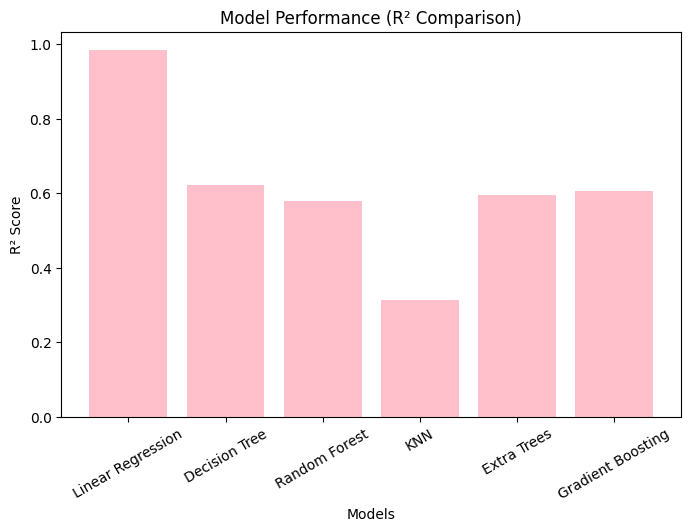

In [ ]:
# 📊 Bar chart to compare model performance (R²)

plt.figure(figsize=(8,5))                                      # make chart size
plt.bar(results_df['Model'], results_df['R²'], color='pink')   # draw bar chart
plt.title('Model Performance (R² Comparison)')                 # add title
plt.xlabel('Models')                                           # name for x line
plt.ylabel('R² Score')                                         # name for y line
plt.xticks(rotation=30)                                        # Rotate model names
plt.show()                                                     # show the chart


In [ ]:
# draw all models with real prices
fig = px.line(
    aapl,                        # our data
    x='Date',                    # x-axis is Date
    y=['Close',                  # real price
       'Predicted_Close_LR',     # Linear Regression
       'Predicted_Close_DT',     # Decision Tree
       'Predicted_Close_RF',     # Random Forest
       'Predicted_Close_KNN',    # KNN
       'Predicted_Close_ET',     # Extra Trees
       'Predicted_Close_GB'],    # Gradient Boosting
    title='Real vs Predicted Prices (All Models)',  # chart title
    labels={'value':'Price', 'Date':'Date'},        # names for axis
    width=1000, height=500                         # chart size
)

# show the chart
fig.show()


In [ ]:
# find the best model (the one with highest R²)
best_model = results_df.loc[results_df['R²'].idxmax(), 'Model']

# print the best model name
print("🌟 The best model is:", best_model)


🌟 The best model is: Linear Regression


In [ ]:
# draw line for real prices and predicted prices (best model : Linear Regression)
fig = px.line(aapl,
              x='Date',
              y=['Close', 'Predicted_Close_LR'],
              title='Real vs Predicted Close Prices (Linear Regression)',
              labels={'value':'Price', 'Date':'Date'},
              width=900, height=400)

# show the chart
fig.show()


In [ ]:
# print final summary

print("✅ All models trained and tested successfully.")
print("✅ Linear Regression gave the best result (R² ≈ 0.98).")
print("🎯 Project finished - Milestone 3 completed!")


✅ All models trained and tested successfully.
✅ Linear Regression gave the best result (R² ≈ 0.98).
🎯 Project finished - Milestone 3 completed!
